# Data Cleaning

Source: https://www.kaggle.com/datasets/abcsds/pokemon

## Imports

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [69]:
# load data
df = pd.read_csv("data/Pokemon.csv", delimiter=",")

In [70]:
df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [71]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


## Data Preperation

In [72]:
del df["#"]
del df["Total"]
df["Type 2"].fillna("None")

0      Poison
1      Poison
2      Poison
3      Poison
4        None
        ...  
795     Fairy
796     Fairy
797     Ghost
798      Dark
799     Water
Name: Type 2, Length: 800, dtype: object

Daten wurden auch manuell manipuliert

In [73]:
def adjust_name(name):
    if 'Mega' in name:
        # Teilt den Namen am "Mega" und nimmt den letzten Teil
        return 'Mega ' + name.split('Mega')[1].strip()
    return name

def insert_dash(name):
    # Teile den Namen auf und füge " - " ein
    for size in ['Average', 'Small', 'Large', 'Super']:
        if size in name:
            name = name.replace(size, ' - ' + size)
            break
    return name

def clean_name(name):
    # Prüfen auf Wiederholungen durch Teilen des Namens
    parts = name.split()
    if len(parts) > 1 and parts[0] in name.replace(parts[0], '', 1):
        return parts[0] + ' ' + name.replace(parts[0], '', 1).strip()
    return name


# Namen anpassen
df['Name'] = df['Name'].apply(insert_dash)
df['Name'] = df['Name'].apply(adjust_name)
df['Name'] = df['Name'].apply(clean_name)
df['Name'] = df['Name'].replace('HoopaHoopa', 'Hoopa', regex=True)
df['Name'] = df['Name'].replace('GroudonPrimal', 'Primal', regex=True)


In [74]:
df.to_csv("data/preprocessed_pokemon.csv")

### Merge Evoulationphase

## Data Understanding

### Functions

In [4]:
def df_nan_values(df):
    for i in df.columns:
        print(f"column {i} have: {df[i].isna().sum()} NaN Values")

### Overview

In [6]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [16]:
df_nan_values(df)

column # have: 0 NaN Values
column Name have: 0 NaN Values
column Type 1 have: 0 NaN Values
column Type 2 have: 386 NaN Values
column Total have: 0 NaN Values
column HP have: 0 NaN Values
column Attack have: 0 NaN Values
column Defense have: 0 NaN Values
column Sp. Atk have: 0 NaN Values
column Sp. Def have: 0 NaN Values
column Speed have: 0 NaN Values
column Generation have: 0 NaN Values
column Legendary have: 0 NaN Values


### Plots

#### Counting

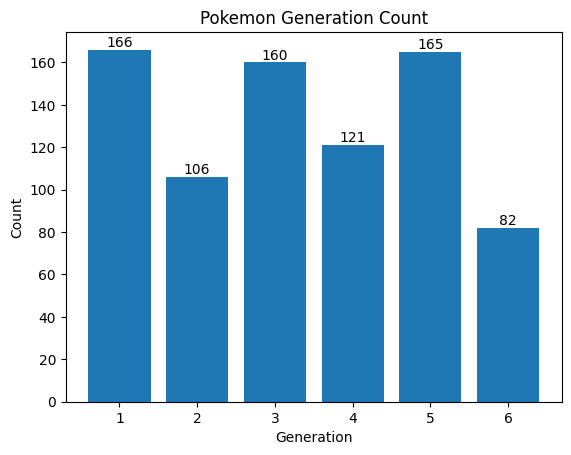

In [29]:
generation_count = df['Generation'].value_counts()

# Sorting the values by Generation
generation_count = generation_count.sort_index()

# Generating the bar plot
plt.bar(generation_count.index, generation_count.values)

# Adding the exact values above each bar
for x, y in zip(generation_count.index, generation_count.values):
    plt.text(x, y, str(y), ha='center', va='bottom')

# Giving the titles
plt.title('Pokemon Generation Count')
plt.xlabel('Generation')
plt.ylabel('Count')

# Showing our plot
plt.show()

#### Stats

<Axes: xlabel='Defense', ylabel='Attack'>

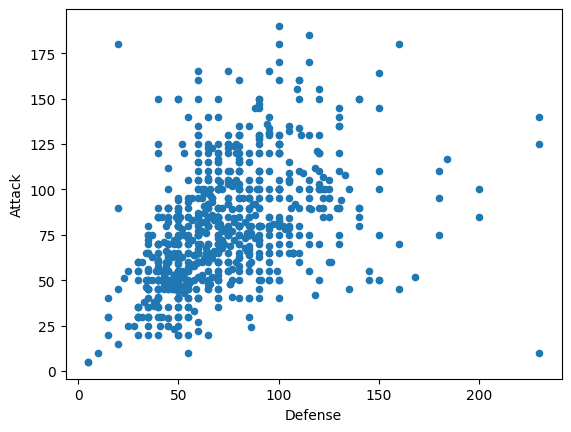

In [7]:
df.plot.scatter(x='Defense', y='Attack')

<Axes: xlabel='Sp. Atk', ylabel='Sp. Def'>

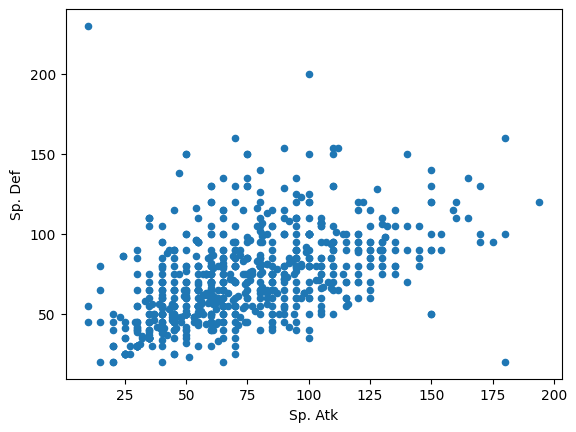

In [7]:
df.plot.scatter(x='Sp. Atk', y='Sp. Def')

<Axes: xlabel='Sp. Atk', ylabel='Sp. Def'>

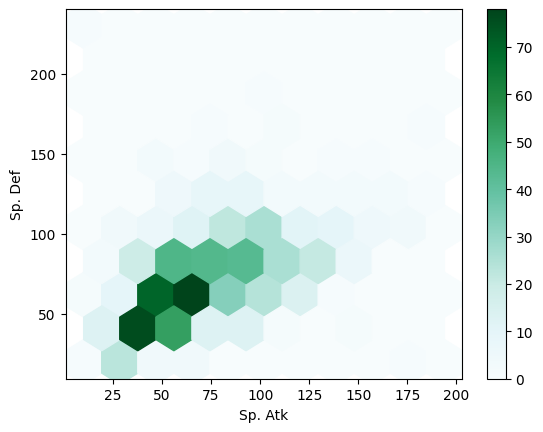

In [8]:
df.plot.hexbin(x='Sp. Atk', y='Sp. Def', gridsize=10)

<Axes: xlabel='Defense', ylabel='Attack'>

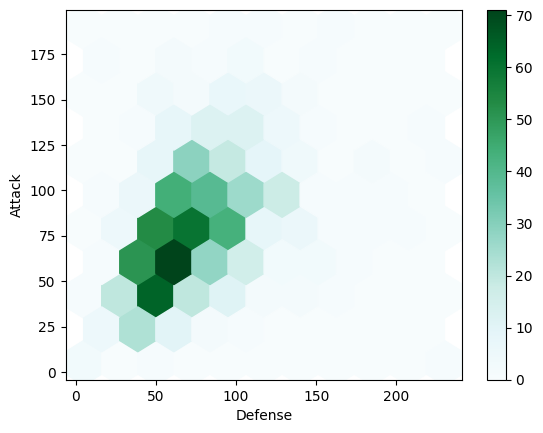

In [9]:
df.plot.hexbin(x='Defense', y='Attack', gridsize=10)

### Strongest Generation (Violine Plots)

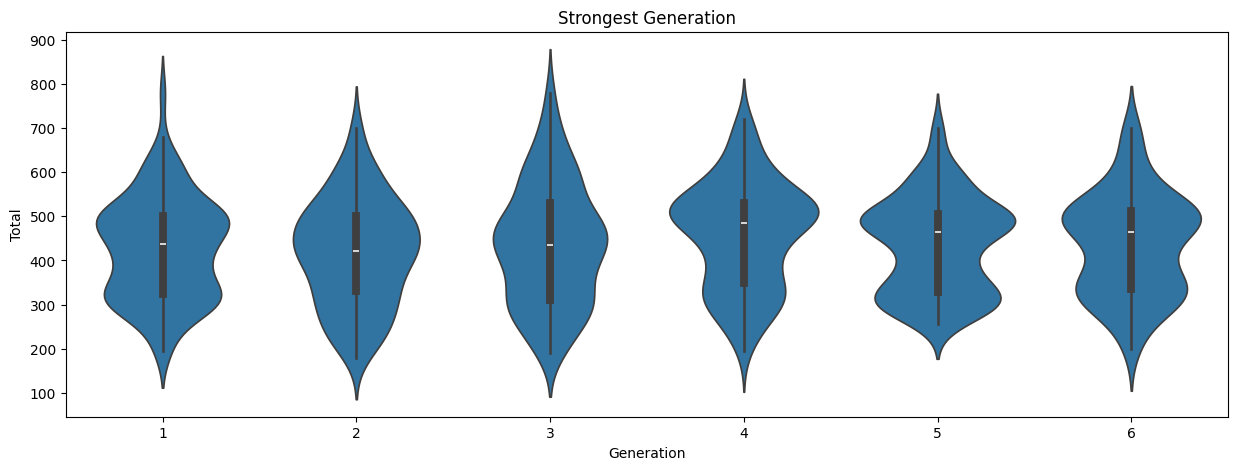

In [11]:
# Diagramm erstellen
plt.subplots(figsize=(15,5))
plt.title('Strongest Generation')
sns.violinplot(x="Generation", y="Total", data=df)
plt.show()

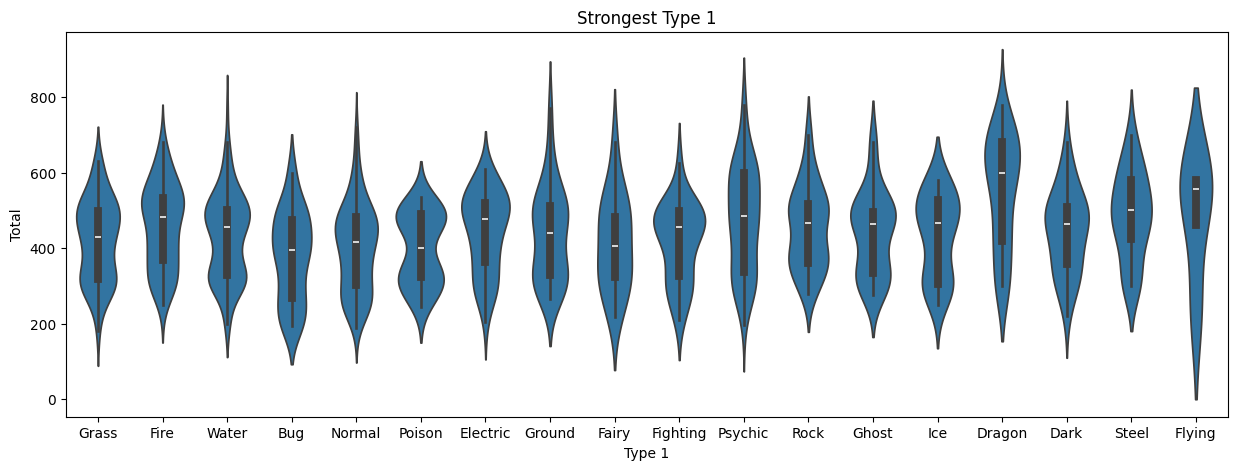

In [25]:
plt.subplots(figsize=(15,5))
plt.title('Strongest Type 1')
sns.violinplot(x="Type 1", y="Total", data=df)
plt.show()

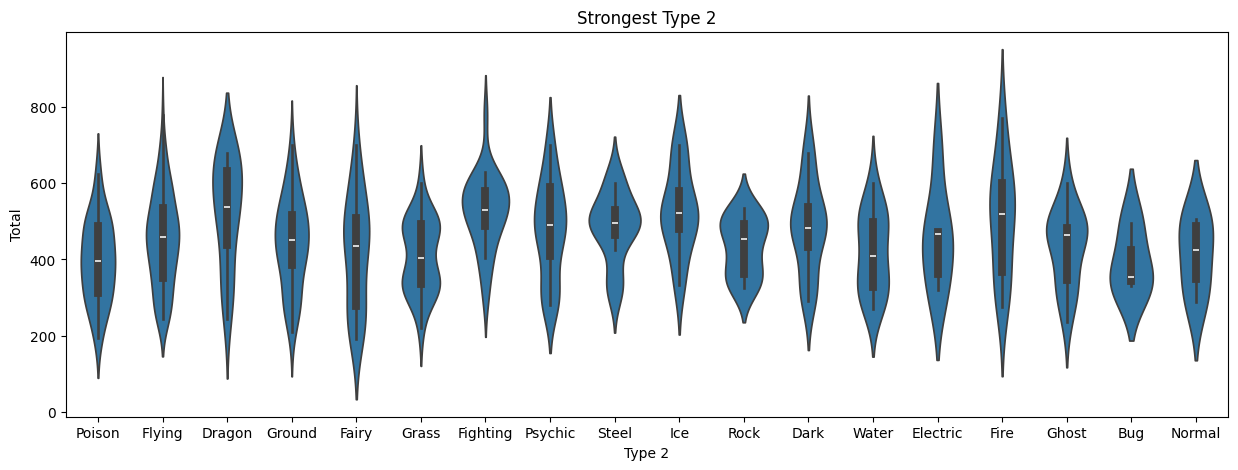

In [24]:
plt.subplots(figsize=(15,5))
plt.title('Strongest Type 2')
sns.violinplot(x="Type 2", y="Total", data=df)
plt.show()

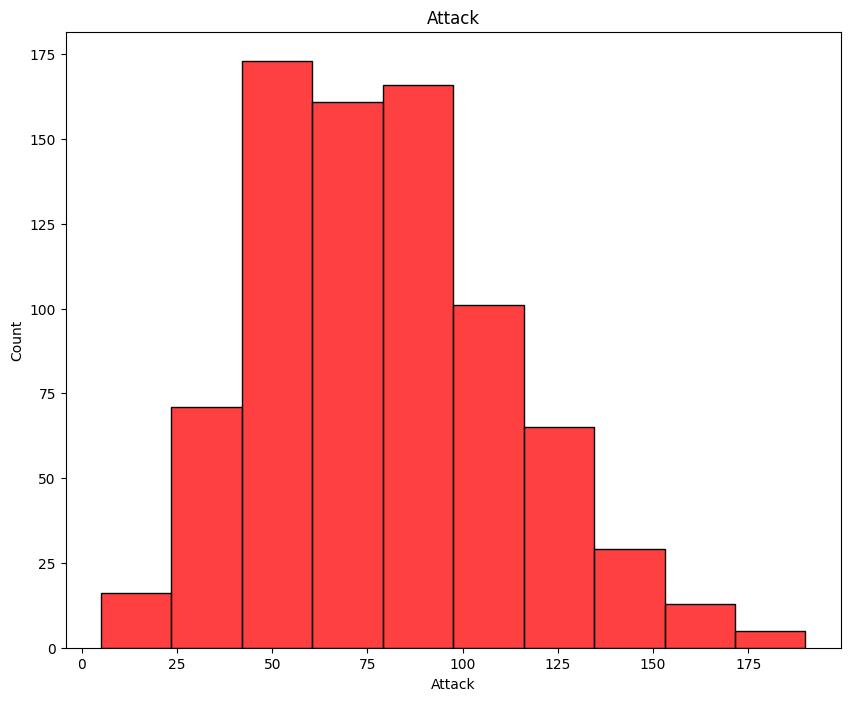

In [20]:
f,ax=plt.subplots(figsize=(10,8))
x=df['Attack Count']
ax=sns.histplot(x,bins=10,color="red")
plt.title('Attack')
plt.show()

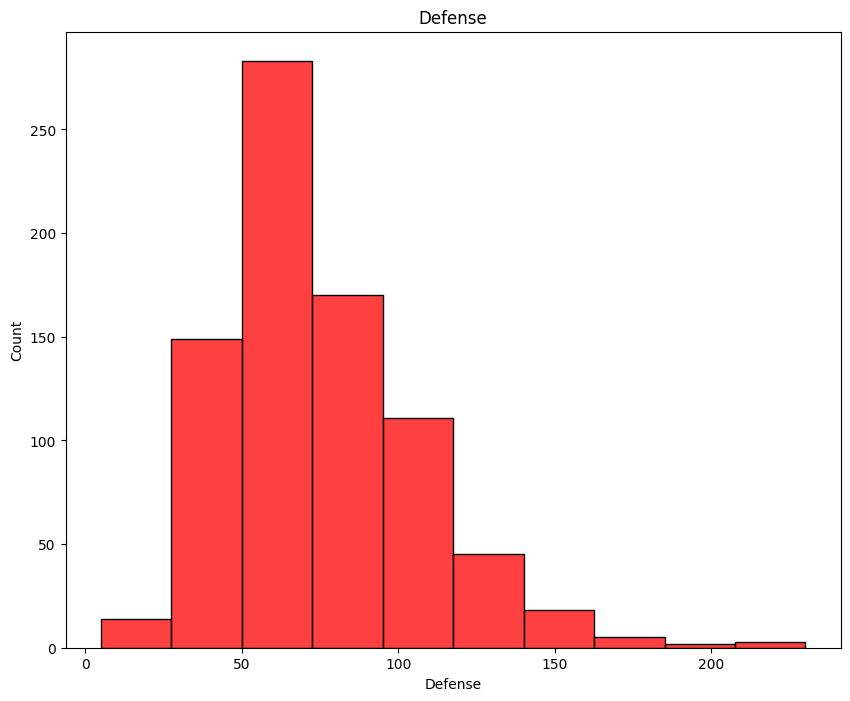

In [21]:
f,ax=plt.subplots(figsize=(10,8))
x=df['Defense Count']
ax=sns.histplot(x,bins=10,color="red")
plt.title('Defense')
plt.show()

### Correlations

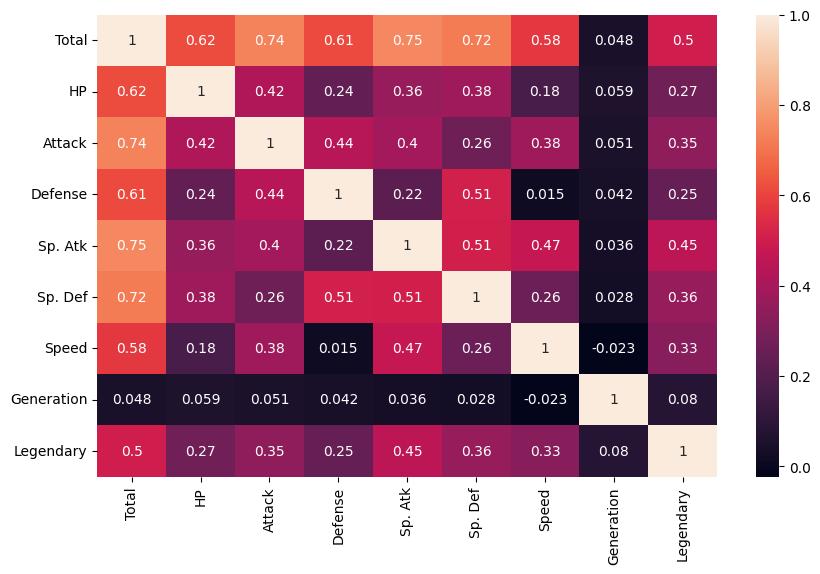

In [13]:
plt.figure(figsize=(10,6))
sns.heatmap(df[["Total", "HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed", "Generation", "Legendary"]].corr(),annot=True) #df.corr() makes a correlation matrix and sns.heatmap is used to show the correlations heatmap
plt.show()

### Type Plot

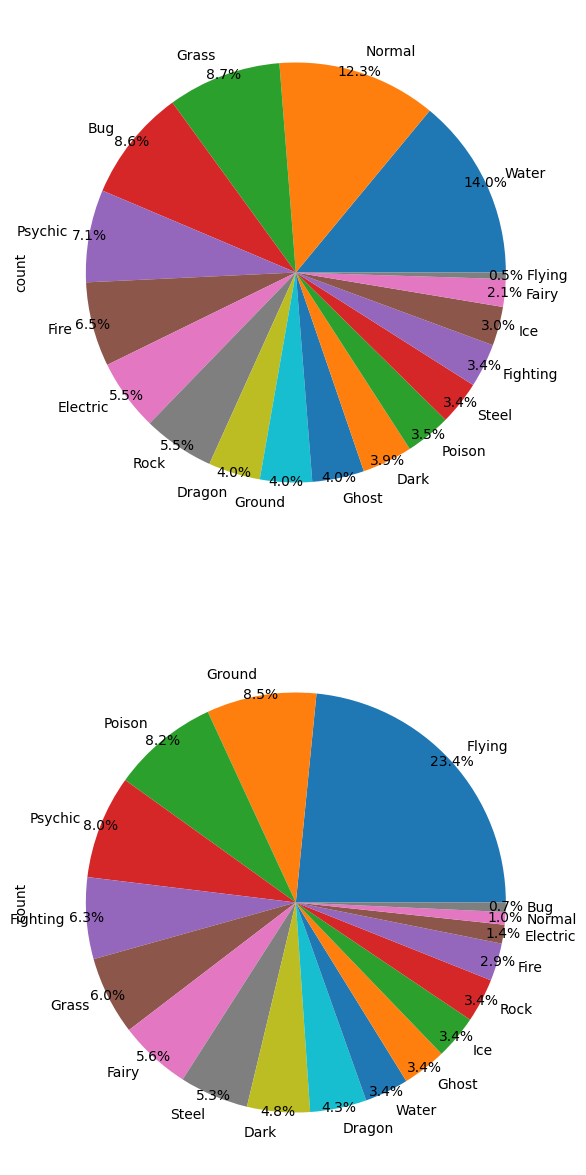

In [27]:
fig = plt.figure(figsize=(15,15))

fig.add_subplot(211)
df['Type 1'].value_counts().plot(kind='pie', 
                                       autopct='%1.1f%%',
                                       pctdistance=1.0)

fig.add_subplot(212)
df['Type 2'].value_counts().plot(kind='pie', 
                                       autopct='%1.1f%%',
                                       pctdistance=1.0)

plt.show()